In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [4]:
df['speed']

0       0.000
1       0.125
2       0.150
3       0.225
4       0.275
        ...  
495    24.775
496    24.850
497    24.875
498    24.950
499    25.000
Name: speed, Length: 500, dtype: float64

In [6]:
df['power']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
Name: power, Length: 500, dtype: float64

In [10]:
df.head(21)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [14]:
df.tail(21)

,speed,power
479,23.949,95.364
480,23.974,94.270
481,24.024,105.992
482,24.049,93.524
483,24.174,95.869
484,24.199,101.419
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [15]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [34]:
plt.rcParams['figure.figsize'] = (20, 10)

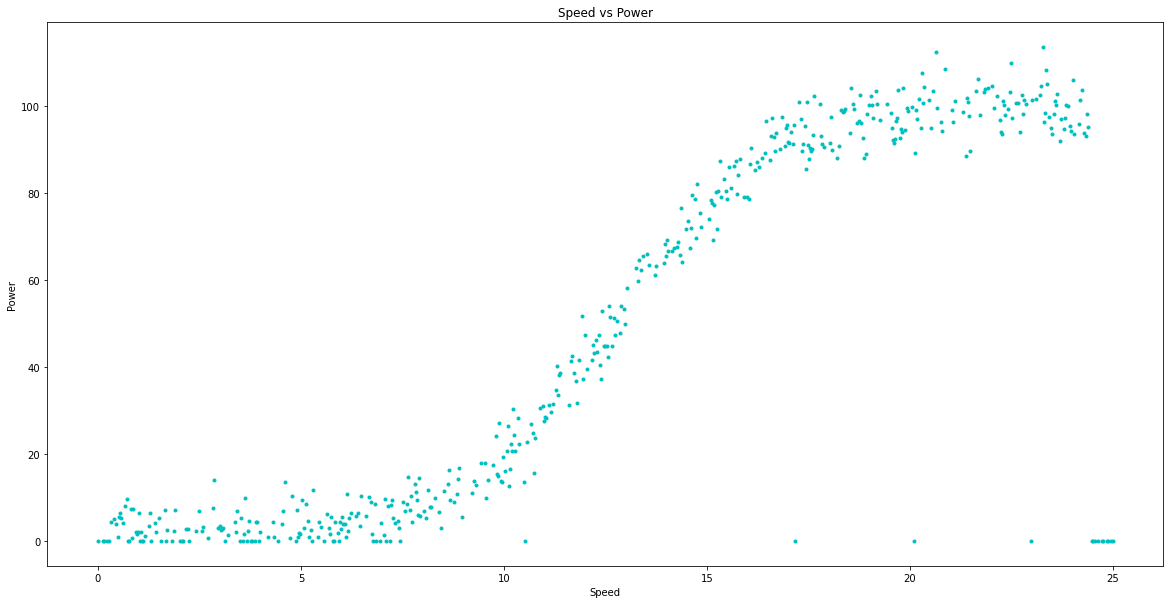

In [66]:
plt.plot(df['speed'] , df['power'] , 'c.');
plt.xlabel('Speed');
plt.ylabel('Power');

plt.title('Speed vs Power');

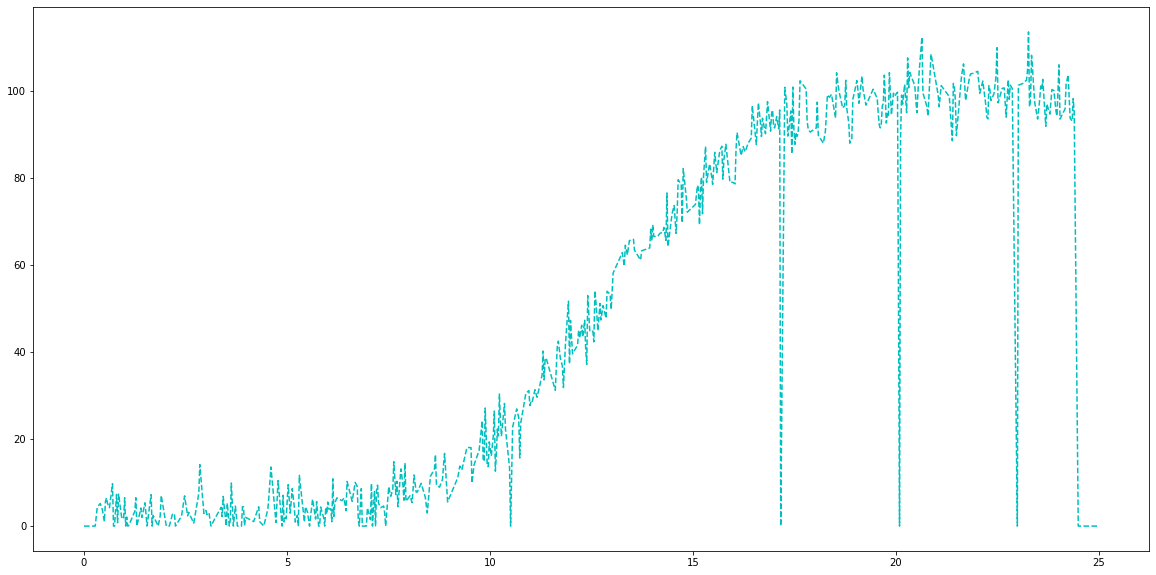

In [42]:
plt.plot(df['speed'], df['power'], 'c--');

In [82]:
coeffs = np.polyfit(df['speed'], df['power'], 1,)
coeffs

array([  4.91759567, -13.89990263])

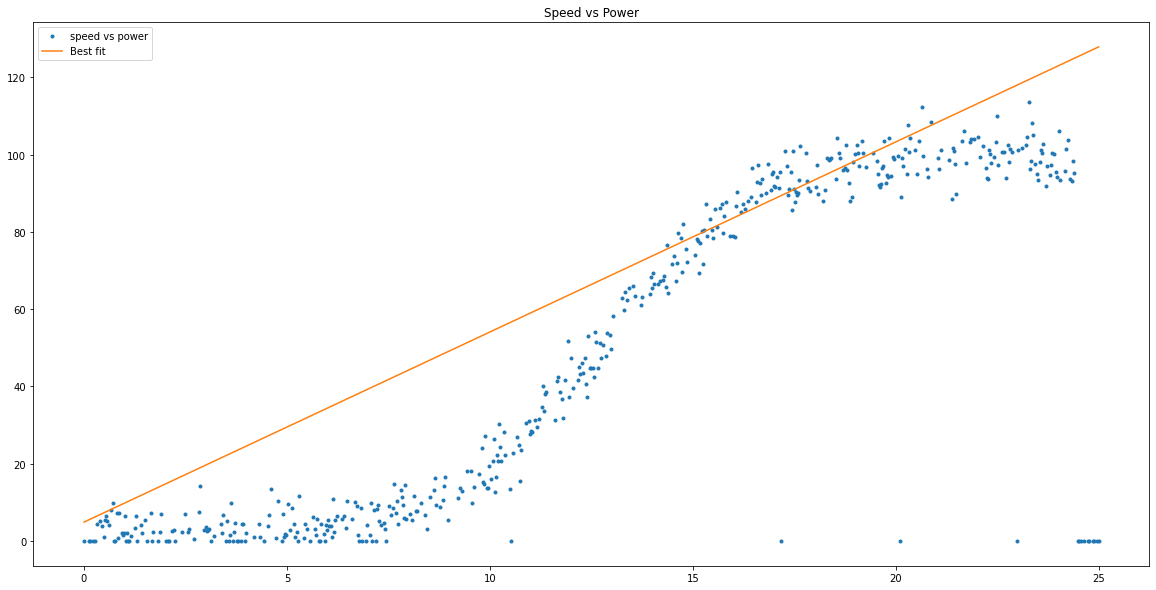

In [93]:
plt.plot(df['speed'], df['power'], '.', label='speed vs power');
plt.plot(df['speed'], coeffs[0] * df['speed'] + coeffs[0], '-', label='Best fit')
plt.title('Speed vs Power')
plt.legend();
plt.show();